# Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Read Data

In [2]:
df = pd.read_csv('diabetes.csv')

# Data Inspection

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
# value cannot be 0 for these columns
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']

In [9]:
# replacing 0 with null values
for x in cols:
    df[x] = df[x].where(df[x]!=0,np.nan)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Checking missing values

In [11]:
df.isna().sum().sort_values(ascending=False)

Insulin                     374
SkinThickness               227
BloodPressure                35
BMI                          11
Glucose                       5
Outcome                       0
Age                           0
DiabetesPedigreeFunction      0
Pregnancies                   0
dtype: int64

In [12]:
# calculating age group wise mean for Insulin,SkinThickness,BloodPressure,BMI
def compute_agewise(col):
    
    # age 21 to 35, replace null values with mean 
    df[col].loc[df[(df[col].isna()==True)&((df.Age>20)&(df.Age<=35))].index] = \
                            round(df[(df.Age>20)&(df.Age<=35)][col].mean(),1)
    
    # age 36 to 50, replace null values with mean 
    df[col].loc[df[(df[col].isna()==True)&((df.Age>35)&(df.Age<=50))].index] = \
                            round(df[(df.Age>35)&(df.Age<=50)][col].mean(),1)
    
    # age 51 to 70, replace null values with mean 
    df[col].loc[df[(df[col].isna()==True)&((df.Age>50)&(df.Age<=70))].index] = \
                            round(df[(df.Age>50)&(df.Age<=70)][col].mean(),1)
    
    # age geater than 71, replace null values with mean 
    df[col].loc[df[(df[col].isna()==True)&(df.Age>70)].index] = \
                            round(df[df.Age>70][col].mean(),1)
compute_agewise('Insulin')
compute_agewise('SkinThickness')
compute_agewise('BloodPressure')
compute_agewise('BMI')

In [13]:
round(df.Glucose.mean(),1)

121.7

In [14]:
# Replacing with mean
df.Glucose.fillna(round(df.Glucose.mean(),1),inplace=True)

In [15]:
df.isna().sum().sort_values(ascending=False)

Outcome                     0
Age                         0
DiabetesPedigreeFunction    0
BMI                         0
Insulin                     0
SkinThickness               0
BloodPressure               0
Glucose                     0
Pregnancies                 0
dtype: int64

No missing values, data is clean now.

# Checking Outliers

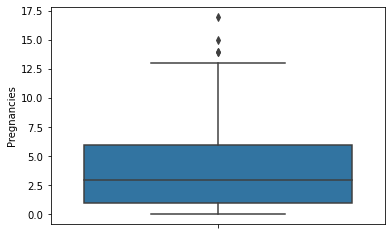

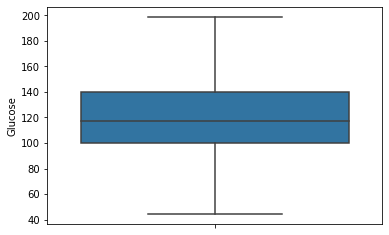

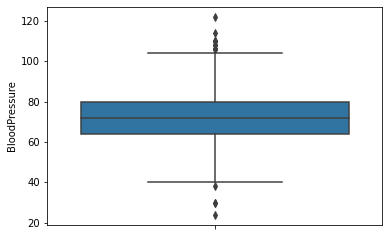

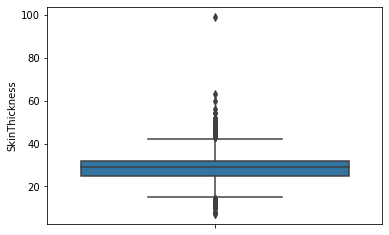

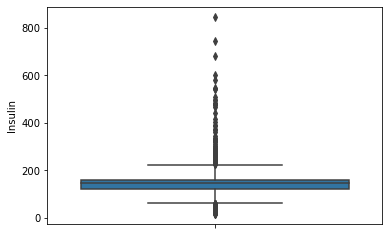

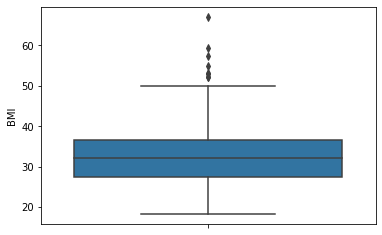

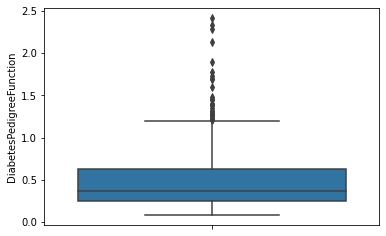

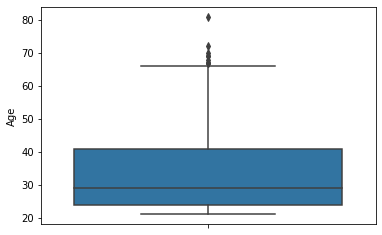

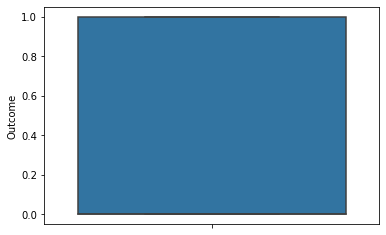

In [16]:
for x in df.columns:
    sns.boxplot(y=df[x])
    plt.show()

No outliers, all data points looks in clusters 

# Create X and Y

In [17]:
X = df.drop('Outcome',axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,155.3,33.6,0.627,50
1,1,85.0,66.0,29.0,145.6,26.6,0.351,31
2,8,183.0,64.0,28.3,145.6,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,145.6,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,31.3,155.3,30.1,0.349,47


In [18]:
Y = df.Outcome
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

# Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X) 
print(X)

[[ 0.63994726  0.86510524 -0.02937723 ...  0.1673682   0.46849198
   1.4259954 ]
 [-0.84488505 -1.20616437 -0.52487604 ... -0.85139474 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01581057 -0.69004232 ... -1.33166869  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02258174 -0.02937723 ... -0.90960976 -0.68519336
  -0.27575966]
 [-0.84488505  0.14180474 -1.02037486 ... -0.34201327 -0.37110101
   1.17073215]
 [-0.84488505 -0.943146   -0.1945435  ... -0.298352   -0.47378505
  -0.87137393]]


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, 
random_state=10)

# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train, Y_train)
Y_pred=lr.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score,recall_score,roc_curve,roc_auc_score

cfm=confusion_matrix(Y_test,Y_pred)

print(cfm)

print("Classification Report")

print(classification_report(Y_test,Y_pred))

lracc=round(accuracy_score(Y_test,Y_pred),2)
lrrecall = round(recall_score(Y_test,Y_pred),2)
lrprec = round(precision_score(Y_test,Y_pred),2)

print('Accuracy:',lracc,'Recall:',lrrecall,'Precision:',lrprec)

[[85 10]
 [29 30]]
Classification Report
              precision    recall  f1-score   support

           0       0.75      0.89      0.81        95
           1       0.75      0.51      0.61        59

    accuracy                           0.75       154
   macro avg       0.75      0.70      0.71       154
weighted avg       0.75      0.75      0.73       154

Accuracy: 0.75 Recall: 0.51 Precision: 0.75


In [23]:
# predict probabilities
lrprob = lr.predict_proba(X_test)
# roc curve
lr_fpr, lr_tpr, lr_thresh = roc_curve(Y_test, lrprob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

# auc scores
lr_auc_score = round(roc_auc_score(Y_test, lrprob[:,1]),2)
print('AUC Score:',lr_auc_score)

AUC Score: 0.84


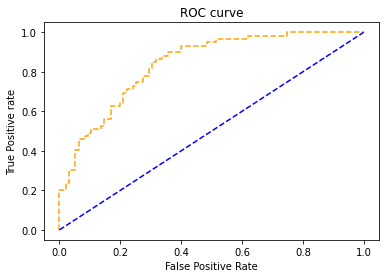

In [24]:
#plot roc curve
plt.plot(lr_fpr, lr_tpr, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.show()

# Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
Y_pred=dt.predict(X_test)

In [26]:
cfm=confusion_matrix(Y_test,Y_pred)

print(cfm)

print("Classification Report")

print(classification_report(Y_test,Y_pred))

dtacc=round(accuracy_score(Y_test,Y_pred),2)
dtrecall = round(recall_score(Y_test,Y_pred),2)
dtprec = round(precision_score(Y_test,Y_pred),2)

print('Accuracy:',dtacc,'Recall:',dtrecall,'Precision:',dtprec)

[[72 23]
 [22 37]]
Classification Report
              precision    recall  f1-score   support

           0       0.77      0.76      0.76        95
           1       0.62      0.63      0.62        59

    accuracy                           0.71       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.71      0.71      0.71       154

Accuracy: 0.71 Recall: 0.63 Precision: 0.62


AUC Score: 0.69


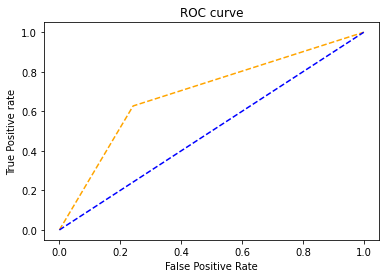

In [27]:
# predict probabilities
dtprob = dt.predict_proba(X_test)
# roc curve
dt_fpr, dt_tpr, dt_thresh = roc_curve(Y_test, dtprob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

# auc scores
dt_auc_score = round(roc_auc_score(Y_test, dtprob[:,1]),2)
print('AUC Score:',dt_auc_score)


#plot roc curve
plt.plot(dt_fpr, dt_tpr, linestyle='--',color='orange', label='Decision Tree')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.show()

# Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
Y_pred=rf.predict(X_test)

In [29]:
cfm=confusion_matrix(Y_test,Y_pred)

print(cfm)

print("Classification Report")

print(classification_report(Y_test,Y_pred))

rfacc=round(accuracy_score(Y_test,Y_pred),2)
rfrecall = round(recall_score(Y_test,Y_pred),2)
rfprec = round(precision_score(Y_test,Y_pred),2)

print('Accuracy:',rfacc,'Recall:',rfrecall,'Precision:',rfprec)

[[82 13]
 [29 30]]
Classification Report
              precision    recall  f1-score   support

           0       0.74      0.86      0.80        95
           1       0.70      0.51      0.59        59

    accuracy                           0.73       154
   macro avg       0.72      0.69      0.69       154
weighted avg       0.72      0.73      0.72       154

Accuracy: 0.73 Recall: 0.51 Precision: 0.7


AUC Score: 0.81


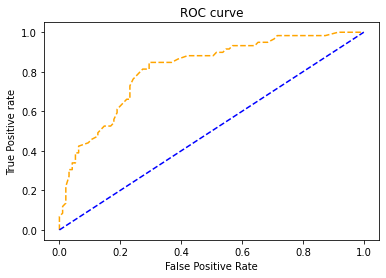

In [30]:
# predict probabilities
rfprob = rf.predict_proba(X_test)
# roc curve
rf_fpr, rf_tpr, rf_thresh = roc_curve(Y_test, rfprob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

# auc scores
rf_auc_score = round(roc_auc_score(Y_test, rfprob[:,1]),2)
print('AUC Score:',rf_auc_score)


#plot roc curve
plt.plot(rf_fpr, rf_tpr, linestyle='--',color='orange', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.show()

# Gradient Boosting

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train,Y_train)
Y_pred = gb.predict(X_test)

In [32]:
cfm=confusion_matrix(Y_test,Y_pred)

print(cfm)

print("Classification Report")

print(classification_report(Y_test,Y_pred))

gbacc=round(accuracy_score(Y_test,Y_pred),2)
gbrecall = round(recall_score(Y_test,Y_pred),2)
gbprec = round(precision_score(Y_test,Y_pred),2)

print('Accuracy:',gbacc,'Recall:',gbrecall,'Precision:',gbprec)

[[80 15]
 [22 37]]
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.84      0.81        95
           1       0.71      0.63      0.67        59

    accuracy                           0.76       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154

Accuracy: 0.76 Recall: 0.63 Precision: 0.71


AUC Score: 0.83


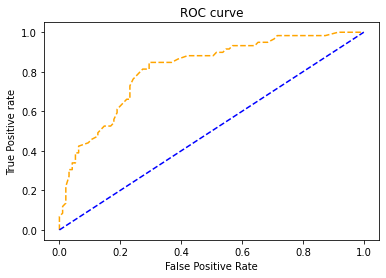

In [33]:
# predict probabilities
gbprob = gb.predict_proba(X_test)
# roc curve
gb_fpr, gb_tpr, gb_thresh = roc_curve(Y_test, gbprob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

# auc scores
gb_auc_score = round(roc_auc_score(Y_test, gbprob[:,1]),2)
print('AUC Score:',gb_auc_score)


#plot roc curve
plt.plot(rf_fpr, rf_tpr, linestyle='--',color='orange', label='Gradient Boosting')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.show()

# XGB

In [34]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train,Y_train)
Y_pred = xg.predict(X_test)

[16:48:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [35]:
cfm=confusion_matrix(Y_test,Y_pred)

print(cfm)

print("Classification Report")

print(classification_report(Y_test,Y_pred))

xgacc=round(accuracy_score(Y_test,Y_pred),2)
xgrecall = round(recall_score(Y_test,Y_pred),2)
xgprec = round(precision_score(Y_test,Y_pred),2)

print('Accuracy:',xgacc,'Recall:',xgrecall,'Precision:',xgprec)

[[79 16]
 [25 34]]
Classification Report
              precision    recall  f1-score   support

           0       0.76      0.83      0.79        95
           1       0.68      0.58      0.62        59

    accuracy                           0.73       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.73      0.73      0.73       154

Accuracy: 0.73 Recall: 0.58 Precision: 0.68


AUC Score: 0.77


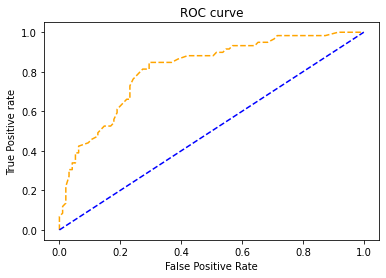

In [36]:
# predict probabilities
xgprob = xg.predict_proba(X_test)
# roc curve
xg_fpr, xg_tpr, xg_thresh = roc_curve(Y_test, xgprob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

# auc scores
xg_auc_score = round(roc_auc_score(Y_test, xgprob[:,1]),2)
print('AUC Score:',xg_auc_score)


#plot roc curve
plt.plot(rf_fpr, rf_tpr, linestyle='--',color='orange', label='XG Boost')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.show()

# Voting Classifier

In [37]:
from sklearn.ensemble import VotingClassifier

# create sub models
estimators = []

model1 = DecisionTreeClassifier()
estimators.append(('dt',model1))
model2 = GradientBoostingClassifier()
estimators.append(('gb',model2))
model3 = XGBClassifier()
estimators.append(('xgb',model3))

# create the ensemble model
ensemble = VotingClassifier(estimators,voting='soft')
ensemble.fit(X_train,Y_train)
Y_pred = ensemble.predict(X_test)

[16:48:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [38]:
cfm=confusion_matrix(Y_test,Y_pred)

print(cfm)

print("Classification Report")

print(classification_report(Y_test,Y_pred))

vcacc=round(accuracy_score(Y_test,Y_pred),2)
vcrecall = round(recall_score(Y_test,Y_pred),2)
vcprec = round(precision_score(Y_test,Y_pred),2)

print('Accuracy:',vcacc,'Recall:',vcrecall,'Precision:',vcprec)

[[80 15]
 [19 40]]
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        95
           1       0.73      0.68      0.70        59

    accuracy                           0.78       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.78      0.78      0.78       154

Accuracy: 0.78 Recall: 0.68 Precision: 0.73


AUC Score: 0.81


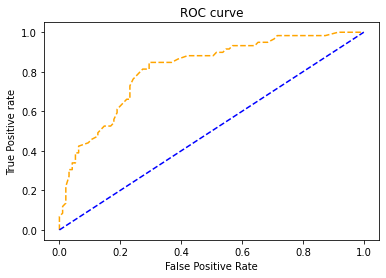

In [39]:
# predict probabilities
vcprob = ensemble.predict_proba(X_test)
# roc curve
vc_fpr, vc_tpr, vc_thresh = roc_curve(Y_test, vcprob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

# auc scores
vc_auc_score = round(roc_auc_score(Y_test, vcprob[:,1]),2)
print('AUC Score:',vc_auc_score)


#plot roc curve
plt.plot(rf_fpr, rf_tpr, linestyle='--',color='orange', label='Voting Classifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.show()

# Comparing Models

In [ ]:
result = pd.DataFrame({'Accuracy':[lracc,dtacc,rfacc,gbacc,xgacc,vcacc],
                         'Recall':[lrrecall,dtrecall,rfrecall,gbrecall,xgrecall,vcrecall],
                         'Precision':[lrprec,dtprec,rfprec,gbprec,xgprec,vcprec],
                         'Auc':[lr_auc_score,dt_auc_score,rf_auc_score,gb_auc_score,xg_auc_score,vc_auc_score]},
                      
                        index=['Logistic Regression','Decision Tree','Random Forest','Gradient Boosting','XG Boost','Voting Classifier'])

In [ ]:
result

## Accuracy

In [ ]:
sns.barplot(y = result.Accuracy.sort_values(ascending=False).index,
           x = result.Accuracy.sort_values(ascending=False))

## Precision

In [ ]:
sns.barplot(y = result.Precision.sort_values(ascending=False).index,
           x = result.Precision.sort_values(ascending=False))

## Recall

In [ ]:
sns.barplot(y = result.Recall.sort_values(ascending=False).index,
           x = result.Recall.sort_values(ascending=False))

# AUC Score

In [ ]:
sns.barplot(y = result.Auc.sort_values(ascending=False).index,
           x = result.Auc.sort_values(ascending=False))

In [ ]:
plt.plot(lr_fpr, lr_tpr, linestyle='--',color='blue', label='Logistic Regression')
plt.plot(dt_fpr, dt_tpr, linestyle='--',color='brown', label='Decision Tree')
plt.plot(rf_fpr, rf_tpr, linestyle='--',color='green', label='Random Forest')
plt.plot(rf_fpr, rf_tpr, linestyle='-.',color='orange', label='Gradient Boosting')
plt.plot(rf_fpr, rf_tpr, linestyle='--',color='purple', label='XG Boost')
plt.plot(rf_fpr, rf_tpr, linestyle='--',color='red', label='Voting Classifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='yellow')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()